<a href="https://colab.research.google.com/github/elhmadany/Linear-Regression-LR-/blob/master/timeSeries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd  
import numpy as np
from math import sqrt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import MinMaxScaler
import os
# visualization
import seaborn as sns
from scipy import stats
from sklearn.ensemble import RandomForestRegressor

import matplotlib.pyplot as plt
sns.set() # setting seaborn default for plots
%matplotlib inline
from sklearn import metrics
from sklearn.model_selection import validation_curve
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.linear_model import LinearRegression,Lasso,ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.model_selection import KFold,train_test_split



# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Activation
# from tensorflow.keras.callbacks import EarlyStopping

Using TensorFlow backend.


In [2]:

from google.colab import drive

drive.mount('/content/gdrive')




Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
!ls '/content/gdrive/My Drive/Task 2'

'Data Science Challenge.docx'	    DS_VF_Task_test.csv
 DS_VF_Task_sample_submission.csv   DS_VF_Task_train.csv


In [0]:
trainData=pd.read_csv('/content/gdrive/My Drive/Task 2/DS_VF_Task_train.csv',header=0)

In [5]:
trainData.head(5)

,sensor_reading,time_to_failure
0,12,1.4691
1,6,1.4691
2,8,1.4691
3,5,1.4691
4,8,1.4691


In [6]:
trainData.count()

sensor_reading     21772453
time_to_failure    21772453
dtype: int64

In [7]:
trainData.describe()

,sensor_reading,time_to_failure
count,2.177245e+07,2.177245e+07
mean,4.643247e+00,7.084024e-01
std,2.324756e+01,4.100664e-01
min,-4.621000e+03,6.954833e-04
25%,2.000000e+00,3.538995e-01
50%,5.000000e+00,7.072972e-01
75%,7.000000e+00,1.060598e+00
max,5.444000e+03,1.469100e+00


In [0]:
TestData=pd.read_csv('/content/gdrive/My Drive/Task 2/DS_VF_Task_test.csv')


In [11]:
TestData.head()

,sensor_reading
0,-5
1,9
2,22
3,33
4,37


In [0]:
ytrain=trainData[['time_to_failure']]
xtrain=trainData[['sensor_reading']]
xtest=TestData[['sensor_reading']]

In [13]:
ytrain.isnull().sum(),xtrain.isnull().sum()

(time_to_failure    0
 dtype: int64, sensor_reading    0
 dtype: int64)

In [14]:
xtrain.shape,ytrain.shape

((21772453, 1), (21772453, 1))

In [15]:
ytrain.skew()


time_to_failure    0.015326
dtype: float64

In [0]:
# Data Scaling
from sklearn.preprocessing import MinMaxScaler
sc_X = MinMaxScaler()
X_train_sc = sc_X.fit_transform(xtrain)
X_test_sc = sc_X.transform(xtest)
sc_X1 = MinMaxScaler()
y_true_sc=sc_X1.fit_transform(ytrain)

In [0]:
X_train_sc=pd.DataFrame(X_train_sc)
X_test_sc=pd.DataFrame(X_test_sc)
y_true_sc=pd.DataFrame(y_true_sc)

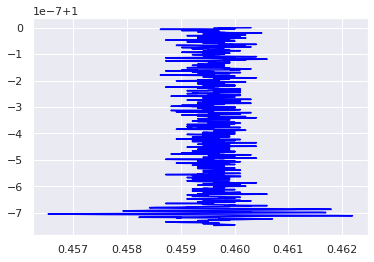

In [18]:
##  Visualization for sample of data
sampleData_Y=y_true_sc.iloc[:1000,:]
sampleData_X=X_train_sc.iloc[:1000,:]

plt.plot(sampleData_X, sampleData_Y, color='blue')
plt.show()


In [0]:
# # Trying here Sequences, Time Series and Prediction by windowed_dataset to prepare time series data

# window_size = 20
# batch_size = 32
# shuffle_buffer_size = 10000
# def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
#   dataset = tf.data.Dataset.from_tensor_slices(series)
#   dataset = dataset.window(window_size+1 , shift=1, drop_remainder=True)
#   dataset = dataset.flat_map(lambda window: window.batch(window_size+1 ))
#   dataset = dataset.shuffle(shuffle_buffer).map(lambda window: (window[:-1], window[-1]))
#   dataset = dataset.batch(batch_size).prefetch(1)
#   return dataset


In [0]:
# dataset=windowed_dataset(trainData,window_size,batch_size,shuffle_buffer_size)

In [0]:

# model = tf.keras.models.Sequential([
#     tf.keras.layers.Dense(1000,input_shape=[window_size], activation="relu"), 
#     tf.keras.layers.Dense(100, activation="relu"),
#     tf.keras.layers.Dense(50, activation="relu"), 
#     tf.keras.layers.Dense(1)
# ])

In [0]:
# model = tf.keras.models.Sequential([l0])
# model.compile(loss="mse", optimizer=tf.keras.optimizers.SGD(lr=1e-6, momentum=0.9))
# model.fit(dataset,epochs=10,verbose=0)

In [0]:
# Divide our data into train and test
X_train,X_test,Y_train,Y_test=train_test_split(X_train_sc,y_true_sc,test_size=0.2,random_state=42)

In [31]:
# Trying First Model is linear Regression

model1= LinearRegression()
model1.fit(X_train,Y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
ypre1=model1.predict(X_test)


In [33]:
mean = mean_squared_error(y_pred=ypre1,y_true=Y_test)
r2_scor = r2_score(y_pred=ypre1,y_true=Y_test)
absloute = mean_absolute_error(y_pred=ypre1,y_true=Y_test)
rmse = sqrt(mean_squared_error(y_pred=ypre1,y_true=Y_test))
print(mean,r2_scor,absloute,rmse)

0.07798197985146148 1.566546510289868e-07 0.24146780055869457 0.2792525377708526


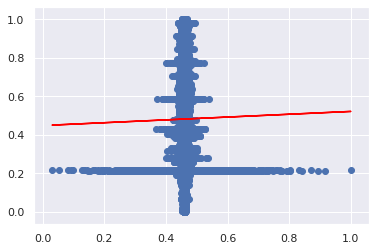

In [34]:

#plt.scatter(X_train_sc, y_true_sc)
plt.scatter(X_test, Y_test)
plt.plot(X_test, ypre1, color='red')
plt.show()


In [35]:
# Second Model is RandomForestRegressor

model2= RandomForestRegressor()
model2.fit(X_train,Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [0]:
ypre2=model2.predict(X_test)


In [40]:
mean = mean_squared_error(y_pred=ypre2,y_true=Y_test)
r2_scor = r2_score(y_pred=ypre2,y_true=Y_test)
absloute = mean_absolute_error(y_pred=ypre2,y_true=Y_test)
rmse = sqrt(mean_squared_error(y_pred=ypre2,y_true=Y_test))
print(mean,r2_scor,absloute,rmse)

0.07773674257214423 0.003144950379647571 0.24116897602637036 0.2788130961273954


In [41]:
model2.get_params()

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

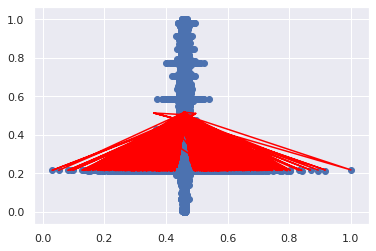

In [42]:
plt.scatter(X_test, Y_test)
plt.plot(X_test, ypre2, color='red')
plt.show()

In [43]:
# third Model is linear Lasso Reg

model3= Lasso()
model3.fit(X_train,Y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [44]:
ypre3=model3.predict(X_test)
mean = mean_squared_error(y_pred=ypre3,y_true=Y_test)
r2_scor = r2_score(y_pred=ypre3,y_true=Y_test)
absloute = mean_absolute_error(y_pred=ypre3,y_true=Y_test)
rmse = sqrt(mean_squared_error(y_pred=ypre3,y_true=Y_test))
print(mean,r2_scor,absloute,rmse)

0.07798200211736861 -1.2887161648933443e-07 0.24146789846186972 0.27925257763782346


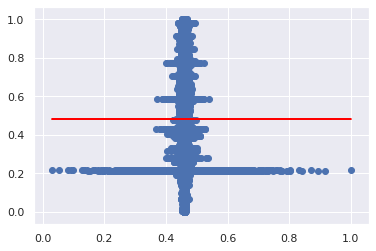

In [45]:
plt.scatter(X_test, Y_test)
plt.plot(X_test, ypre3, color='red')
plt.show()

In [46]:
# fourth Model is DecisionTreeRegressor
model4= DecisionTreeRegressor(max_depth=5)
model4.fit(X_train,Y_train)



DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [47]:
ypre4=model4.predict(X_test)
mean = mean_squared_error(y_pred=ypre4,y_true=Y_test)
r2_scor = r2_score(y_pred=ypre4,y_true=Y_test)
absloute = mean_absolute_error(y_pred=ypre4,y_true=Y_test)
rmse = sqrt(mean_squared_error(y_pred=ypre4,y_true=Y_test))
print(mean,r2_scor,absloute,rmse)

0.07773895711695543 0.0031165522231952902 0.24117421280369605 0.2788170674778634


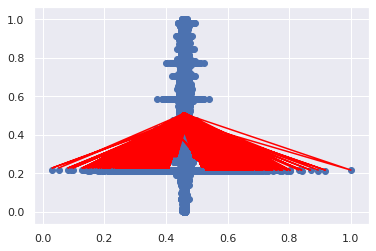

In [48]:
plt.scatter(X_test, Y_test)
plt.plot(X_test, ypre4, color='red')
plt.show()

In [49]:
# fifes Model is PolynomialFeatures
model5 = PolynomialFeatures(degree=4)

X_trainPo = model5.fit_transform(X_train)
X_testPo = model5.fit_transform(X_test)

model = LinearRegression()
model.fit(X_trainPo, Y_train)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [50]:
model5.get_params().keys()   

dict_keys(['degree', 'include_bias', 'interaction_only', 'order'])

In [51]:
ypre5=model.predict(X_testPo)
mean = mean_squared_error(y_pred=ypre5,y_true=Y_test)
r2_scor = r2_score(y_pred=ypre5,y_true=Y_test)
absloute = mean_absolute_error(y_pred=ypre5,y_true=Y_test)
rmse = sqrt(mean_squared_error(y_pred=ypre5,y_true=Y_test))
print(mean,r2_scor,absloute,rmse)

0.07797076304522566 0.00014399507091100716 0.24143619923714008 0.27923245342407044


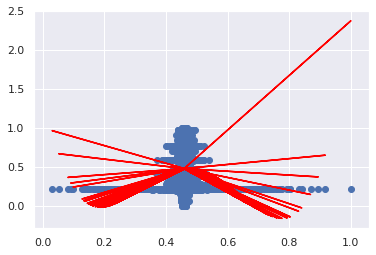

In [52]:
plt.scatter(X_test, Y_test)
plt.plot(X_test, ypre5, color='red')
plt.show()

In [53]:
# Build the neural network
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(15, input_dim=xtrain.shape[1], activation='relu')) # Hidden 1
model.add(tf.keras.layers.Dropout(rate = 0.2))
model.add(tf.keras.layers.Dense(7, activation='relu')) # Hidden 2
model.add(tf.keras.layers.Dense(1)) # Output
model.compile(loss=tf.keras.metrics.mean_squared_error,metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse')] ,optimizer='adam')
monitor = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=1e-3, 
                       patience=5, verbose=1, mode='auto', restore_best_weights=True)
model.fit(X_train,Y_train,batch_size=500,validation_data=(X_test,Y_test),callbacks=[monitor],verbose=1,epochs=50)

Train on 17417962 samples, validate on 4354491 samples
Epoch 1/50
17417962/17417962 [==============================] - 85s 5us/sample - loss: 0.0782 - rmse: 0.2796 - val_loss: 0.0780 - val_rmse: 0.2793
Epoch 2/50
17417962/17417962 [==============================] - 84s 5us/sample - loss: 0.0780 - rmse: 0.2793 - val_loss: 0.0780 - val_rmse: 0.2792
Epoch 3/50
17417962/17417962 [==============================] - 84s 5us/sample - loss: 0.0780 - rmse: 0.2793 - val_loss: 0.0780 - val_rmse: 0.2792
Epoch 4/50
17417962/17417962 [==============================] - 84s 5us/sample - loss: 0.0780 - rmse: 0.2793 - val_loss: 0.0780 - val_rmse: 0.2792
Epoch 5/50
17417962/17417962 [==============================] - 84s 5us/sample - loss: 0.0780 - rmse: 0.2793 - val_loss: 0.0780 - val_rmse: 0.2792
Epoch 6/50
17417962/17417962 [==============================] - 84s 5us/sample - loss: 0.0780 - rmse: 0.2793 - val_loss: 0.0780 - val_rmse: 0.2792
Epoch 00006: early stopping


In [0]:
X = np.array(X_train).reshape(17417962, 1, 1)
#Building LSTM Model

In [55]:
model_LSTM =tf.keras.models.Sequential()
model_LSTM.add((tf.keras.layers.LSTM(1000,activation='relu',input_shape=(1, 1))))

model_LSTM.add(tf.keras.layers.Dense(500,activation='relu'))
model_LSTM.add(tf.keras.layers.Dense(100,activation='relu'))
model_LSTM.add(tf.keras.layers.Dense(50,activation='relu'))
model_LSTM.add(tf.keras.layers.Dense(20,activation='relu'))
model_LSTM.add(tf.keras.layers.Dense(1)) 
model_LSTM.compile(loss=tf.keras.metrics.mean_squared_error,metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse')] ,optimizer=tf.keras.optimizers.SGD(lr=1e-6, momentum=0.9))
print(model_LSTM.summary())

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 1000)              4008000   
_________________________________________________________________
dense_8 (Dense)              (None, 500)               500500    
_________________________________________________________________
dense_9 (Dense)              (None, 100)               50100     
_________________________________________________________________
dense_10 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_11 (Dense)             (None, 20)                1020      
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 21        
Total params: 4,564,691
Trainable params: 4,564,691
Non-trainable params: 0
____________________________________________

In [70]:
 monitor_LSTM = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=1e-3,  patience=5, verbose=1, mode='auto', restore_best_weights=True)
model_LSTM.fit(X, Y_train,batch_size=500, validation_split=0.2,verbose=1,epochs=5)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 13934369 samples, validate on 3483593 samples
Epoch 1/5
13934369/13934369 [==============================] - 203s 15us/sample - loss: 0.1415 - rmse: 0.3761 - val_loss: 0.0836 - val_rmse: 0.2892
Epoch 2/5
13934369/13934369 [==============================] - 203s 15us/sample - loss: 0.0794 - rmse: 0.2817 - val_loss: 0.0781 - val_rmse: 0.2795
Epoch 3/5
13934369/13934369 [==============================] - 202s 15us/sample - loss: 0.0780 - rmse: 0.2793 - val_loss: 0.0780 - val_rmse: 0.2793
Epoch 4/5
13934369/13934369 [==============================] - 202s 14us/sample - loss: 0.0780 - rmse: 0.2793 - val_loss: 0.0780 - val_rmse: 0.2793
Epoch 5/5
13934369/13934369 [==============================] - 202s 14us/sample - loss: 0.0780 - rmse: 0.2793 - val_loss: 0.0780 - val_rmse: 0.2793


In [0]:
ypre4=ypre4.reshape(-1, 1)
ypre_new_inverse = sc_X1.inverse_transform(ypre4)


In [0]:
# So here we will use DecisionTreeRegressor (Model 4)  for prediction


ypre_new_inverse =pd.DataFrame(ypre_new_inverse,columns=['time_to_failure'])

Task2_submission = pd.concat([TestData['sensor_reading'],ypre_new_inverse],axis=1)
Task2_submission.to_csv('Task2_submission.csv',index=False)
